In [109]:
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

import pandas
import pickle
import bz2
import _pickle as cPickle
import zipfile
from tqdm import tqdm

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [110]:
df=pd.read_csv(r"C:\Users\chriq\OneDrive\Documents\my_data\Textminingdata\text_financial\minutes_spy.csv", parse_dates=['date'])

In [111]:
df['contents'] = df['contents'].apply(lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())
df

,Unnamed: 0,date,contents,speaker,title,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+5,SPY: d+6,SPY: d+7,SPY: d+8,SPY: d+9,SPY: d+10,SPY: d+11,SPY: d+12,SPY: d+13,SPY: d+14
0,0,1993-02-03,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,25.864319,26.137705,26.247076,26.228842,26.228842,...,26.083029,26.210615,26.010128,25.353931,25.335707,25.317488,25.408623,25.499762,25.481527,25.809631
1,1,1993-03-23,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,26.242840,26.297781,26.297781,26.462601,26.316103,...,26.499220,26.480902,26.389343,25.839956,25.968130,25.894896,25.986469,25.949833,26.316103,26.371027
2,2,1993-05-18,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,25.876574,25.858263,26.389343,26.462601,26.224524,...,26.389343,26.718983,26.627411,26.499220,26.755627,26.718983,26.627411,26.535849,26.444286,26.206215
3,3,1993-07-07,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,26.096848,26.170630,26.465719,26.539494,26.521049,...,26.594809,26.484146,26.410383,26.391937,26.465719,26.447269,26.262844,26.391937,26.539494,26.521049
4,4,1993-08-17,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,26.779249,26.871473,27.019001,27.019001,27.037451,...,27.277197,27.295652,27.314091,27.295652,27.406319,27.480087,27.443205,27.350975,27.369415,27.184986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,2021-07-28,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,436.076019,435.897217,437.705048,435.579346,434.665497,...,436.046234,438.807648,439.532745,439.175140,439.721466,440.814148,442.135254,442.939850,443.982819,441.072418
220,220,2021-09-22,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,432.111908,436.327057,441.628448,442.355896,441.090363,...,432.929016,427.637634,432.719757,427.139374,431.583740,433.377441,437.124268,436.327057,433.168182,432.101929
221,221,2021-11-03,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,460.282898,463.093048,465.275391,466.889709,467.288300,...,461.996887,462.146362,465.634094,465.793549,467.637085,466.501099,468.085510,467.248474,465.933075,466.550903
222,222,2021-12-15,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,461.737793,468.952454,464.816986,459.869995,454.980011,...,467.690002,470.600006,477.260010,476.869995,477.480011,476.160004,474.959991,477.709991,477.549988,468.380005


In [112]:
print(df.contents.iloc[0])

A meeting of the Federal Open Market Committee was held in       the offices of the Board of Governors of the Federal Reserve System in       Washington, D.C., on Tuesday, February 2, 1993, at 2:30 p.m. and was       continued on Wednesday, February 3, 1993, at 9:00 a.m.PRESENT:Mr. Greenspan, Chairman        Mr. Corrigan, Vice Chairman        Mr. Angell        Mr. Boehne        Mr. Keehn        Mr. Kelley        Mr. LaWare        Mr. Lindsey        Mr. McTeer        Mr. Mullins        Ms. Phillips        Mr. SternMessrs. Broaddus, Jordan, Forrestal, and Parry, Alternate        Members of the Federal Open Market CommitteeMessrs. Hoenig, Melzer, and Syron, Presidents of the Federal        Reserve Banks of Kansas City, St. Louis, and Boston,        respectivelyMr. Kohn, Secretary and Economist        Mr. Bernard, Deputy Secretary        Mr. Coyne, Assistant Secretary        Mr. Gillum, Assistant Secretary        Mr. Mattingly, General Counsel        Mr. Patrikis,1 Deputy General Counsel  

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  224 non-null    int64         
 1   date        224 non-null    datetime64[ns]
 2   contents    224 non-null    object        
 3   speaker     224 non-null    object        
 4   title       224 non-null    object        
 5   SPY: d-1    223 non-null    float64       
 6   SPY: d+0    223 non-null    float64       
 7   SPY: d+1    223 non-null    float64       
 8   SPY: d+2    223 non-null    float64       
 9   SPY: d+3    223 non-null    float64       
 10  SPY: d+4    223 non-null    float64       
 11  SPY: d+5    223 non-null    float64       
 12  SPY: d+6    223 non-null    float64       
 13  SPY: d+7    223 non-null    float64       
 14  SPY: d+8    223 non-null    float64       
 15  SPY: d+9    223 non-null    float64       
 16  SPY: d+10   223 non-null  

# Preprocessing

In [114]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chriq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
stemmer = SnowballStemmer('english')

In [116]:
def lemmatize_stemming(text):
    return stemmer.stem(text)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [117]:
def preprocessing(text):
    # 1. Tokenization: text preprocessing step, which assumes splitting text into tokens
    ret = nltk.word_tokenize(text)  # TODO: discuss if tokenizing on sentence level also makes sense
    # 2. Cleaning: remove punctuation
    ret = [t for t in ret if t not in string.punctuation]
    # 3. Stop words removal
    stop_words = set(nltk.corpus.stopwords.words('english'))
    ret = [t for t in ret if t.lower() not in stop_words]
    # 4. Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    ret = [lemmatizer.lemmatize(t) for t in ret]
    return ret

In [118]:
processed_docs = df['contents'].map(preprocess)
processed_docs

0      [meet, feder, open, market, committe, held, of...
1      [meet, feder, open, market, committe, held, of...
2      [meet, feder, open, market, committe, held, of...
3      [meet, feder, open, market, committe, held, of...
4      [meet, feder, open, market, committe, held, of...
                             ...                        
219    [feder, reserv, central, bank, unit, state, pr...
220    [feder, reserv, central, bank, unit, state, pr...
221    [feder, reserv, central, bank, unit, state, pr...
222    [feder, reserv, central, bank, unit, state, pr...
223    [feder, reserv, central, bank, unit, state, pr...
Name: contents, Length: 224, dtype: object

In [119]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abat
1 abil
2 abroad
3 abrupt
4 absenc
5 acceler
6 accept
7 accommod
8 accompani
9 accord
10 account


In [120]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [121]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[43]

[(0, 1),
 (17, 1),
 (18, 3),
 (19, 1),
 (25, 1),
 (27, 1),
 (31, 1),
 (35, 1),
 (39, 2),
 (41, 2),
 (43, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (49, 1),
 (53, 1),
 (64, 1),
 (65, 2),
 (71, 1),
 (74, 1),
 (77, 1),
 (81, 2),
 (97, 2),
 (102, 2),
 (104, 1),
 (106, 1),
 (107, 1),
 (108, 1),
 (111, 1),
 (123, 1),
 (134, 1),
 (139, 1),
 (142, 1),
 (143, 1),
 (145, 2),
 (146, 1),
 (149, 2),
 (152, 1),
 (155, 3),
 (156, 1),
 (164, 1),
 (166, 1),
 (168, 3),
 (170, 1),
 (171, 2),
 (173, 1),
 (174, 1),
 (175, 1),
 (182, 3),
 (186, 3),
 (198, 1),
 (199, 1),
 (200, 1),
 (204, 2),
 (205, 1),
 (206, 2),
 (210, 1),
 (211, 1),
 (221, 1),
 (224, 1),
 (227, 1),
 (232, 1),
 (234, 1),
 (235, 1),
 (245, 1),
 (249, 2),
 (255, 1),
 (259, 1),
 (267, 2),
 (269, 1),
 (271, 1),
 (278, 1),
 (281, 1),
 (290, 1),
 (294, 1),
 (299, 3),
 (305, 2),
 (308, 1),
 (312, 1),
 (314, 1),
 (317, 1),
 (318, 2),
 (328, 1),
 (332, 1),
 (333, 1),
 (334, 1),
 (343, 1),
 (346, 2),
 (347, 1),
 (356, 1),
 (357, 1),
 (360, 1),
 (365, 1),
 

In [122]:
bow_doc_43 = bow_corpus[43]

for i in range(len(bow_doc_43)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0], 
                                                     dictionary[bow_doc_43[i][0]], 
                                                     bow_doc_43[i][1]))

Word 0 ("abat") appears 1 time.
Word 17 ("amend") appears 1 time.
Word 18 ("ampl") appears 3 time.
Word 19 ("analysi") appears 1 time.
Word 25 ("aris") appears 1 time.
Word 27 ("array") appears 1 time.
Word 31 ("assumpt") appears 1 time.
Word 35 ("attract") appears 1 time.
Word 39 ("banker") appears 2 time.
Word 41 ("behavior") appears 2 time.
Word 43 ("best") appears 1 time.
Word 45 ("boehn") appears 1 time.
Word 46 ("broaddus") appears 1 time.
Word 47 ("broader") appears 1 time.
Word 49 ("buoy") appears 1 time.
Word 53 ("canadian") appears 1 time.
Word 64 ("choic") appears 1 time.
Word 65 ("civilian") appears 2 time.
Word 71 ("concentr") appears 1 time.
Word 74 ("congression") appears 1 time.
Word 77 ("consecut") appears 1 time.
Word 81 ("contempl") appears 2 time.
Word 97 ("deal") appears 2 time.
Word 102 ("delay") appears 2 time.
Word 104 ("deliveri") appears 1 time.
Word 106 ("depositori") appears 1 time.
Word 107 ("design") appears 1 time.
Word 108 ("deterior") appears 1 time.
Wo

In [123]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.01283661233899023),
 (1, 0.00968934642846307),
 (2, 0.031054189818036506),
 (3, 0.009215562521141892),
 (4, 0.027008050262261152),
 (5, 0.024762420643077904),
 (6, 0.025363362406138373),
 (7, 0.04123627646830114),
 (8, 0.059305087484408686),
 (9, 0.025179981407245897),
 (10, 0.021850852471994947),
 (11, 0.028035050108144968),
 (12, 0.01775296131528375),
 (13, 0.013152446641339015),
 (14, 0.01283661233899023),
 (15, 0.054016100524522305),
 (16, 0.024762420643077904),
 (17, 0.07693104933098248),
 (18, 0.013152446641339015),
 (19, 0.021920505039722496),
 (20, 0.025612196382425574),
 (21, 0.037132637037274534),
 (22, 0.03645349044520986),
 (23, 0.020045157579358097),
 (24, 0.020914944473233367),
 (25, 0.04351077949718431),
 (26, 0.166976825342175),
 (27, 0.032504907320444656),
 (28, 0.05122439276485115),
 (29, 0.018973450378027796),
 (30, 0.008759330256124485),
 (31, 0.02061813823415057),
 (32, 0.02251679102389465),
 (33, 0.016225021848936042),
 (34, 0.041829888946466734),
 (35, 0.0

# LDA using bag of words

In [124]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [125]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"shall" + 0.012*"arrang" + 0.008*"back" + 0.008*"april" + 0.008*"strain" + 0.007*"subcommitte" + 0.006*"deterior" + 0.006*"paragraph" + 0.005*"select" + 0.005*"consult"
Topic: 1 
Words: 0.012*"pandem" + 0.010*"desk" + 0.009*"guidanc" + 0.008*"back" + 0.007*"repo" + 0.007*"april" + 0.007*"tool" + 0.006*"princip" + 0.006*"overnight" + 0.006*"mandat"
Topic: 2 
Words: 0.006*"shall" + 0.005*"desk" + 0.005*"arrang" + 0.005*"back" + 0.004*"princip" + 0.004*"paragraph" + 0.004*"april" + 0.003*"select" + 0.003*"repurchas" + 0.003*"mandat"
Topic: 3 
Words: 0.011*"back" + 0.009*"guidanc" + 0.009*"april" + 0.007*"desk" + 0.006*"tool" + 0.005*"deterior" + 0.005*"mandat" + 0.005*"stress" + 0.005*"gross" + 0.004*"function"
Topic: 4 
Words: 0.019*"april" + 0.006*"tech" + 0.004*"greenspan" + 0.004*"mcdonough" + 0.004*"behavior" + 0.004*"moskow" + 0.004*"minehan" + 0.004*"lindsey" + 0.004*"partner" + 0.004*"soften"
Topic: 5 
Words: 0.007*"april" + 0.005*"arrang" + 0.005*"lindsey" 

# LDA using TF-IDF

In [126]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [127]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.004*"april" + 0.003*"disclosur" + 0.002*"symmetri" + 0.002*"lawar" + 0.002*"veloc" + 0.002*"reinvest" + 0.002*"upper" + 0.002*"give" + 0.002*"forrest" + 0.002*"presumpt"
Topic: 1 Word: 0.004*"april" + 0.004*"turmoil" + 0.004*"hurrican" + 0.004*"strain" + 0.003*"asia" + 0.003*"confer" + 0.003*"settl" + 0.003*"tighter" + 0.002*"back" + 0.002*"deterior"
Topic: 2 Word: 0.005*"april" + 0.002*"expens" + 0.002*"legisl" + 0.002*"kelley" + 0.002*"tech" + 0.002*"absent" + 0.002*"slacken" + 0.002*"asymmetr" + 0.002*"regim" + 0.002*"shall"
Topic: 3 Word: 0.003*"april" + 0.002*"mandat" + 0.002*"shall" + 0.002*"soma" + 0.002*"bias" + 0.002*"exhibit" + 0.002*"forese" + 0.002*"upper" + 0.001*"backup" + 0.001*"arrang"
Topic: 4 Word: 0.004*"back" + 0.004*"reinvest" + 0.003*"policymak" + 0.003*"ioer" + 0.003*"desk" + 0.002*"remov" + 0.002*"expir" + 0.002*"scale" + 0.002*"collater" + 0.002*"segment"
Topic: 5 Word: 0.007*"april" + 0.007*"shall" + 0.003*"arrang" + 0.003*"threshold" + 0.003*

# Doc2vec

In [128]:
def read_corpus(f, tokens_only=False):
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(df.contents))

In [129]:
#session crashed when i ran this, even when I had a GPU connected it didnt seem to use the GPU
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec(train_corpus, vector_size=200, window=3, min_count=1, workers=4)

In [130]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 200)

In [131]:
train_vecs_dm

array([[-0.63102686, -0.08959519,  0.4383786 , ...,  0.40208003,
        -0.32720917, -0.07067727],
       [ 0.32243258,  0.00419451, -0.49545544, ...,  0.11083506,
        -0.12254688,  0.05146901],
       [ 0.23271695,  0.5244787 , -0.88714004, ..., -0.5203095 ,
         0.28863046, -0.22706655],
       ...,
       [ 0.8363956 , -1.1332777 , -0.43302676, ...,  0.4044909 ,
         0.3657411 , -0.25719962],
       [-1.1015208 , -2.3262458 , -1.633148  , ...,  0.7889346 ,
         0.5312472 ,  0.21153152],
       [ 0.42866102, -1.8987592 ,  0.9627917 , ..., -0.34651694,
        -0.8916696 ,  0.12465101]], dtype=float32)

# Predictions on SPY changes


In [132]:
def pct_change_from_day_0(announcement):
    pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
    if pct_change>0:
        return 'up'
    else:
        return 'down'

In [133]:
pct_change_from_day_0(df.iloc[141])

'up'

In [134]:
df['+7change']=df.apply(pct_change_from_day_0,axis=1)

In [135]:
df.iloc[141]

Unnamed: 0                                                  141
date                                        2009-11-04 00:00:00
contents      November 3-4, 2009PRESENT:Mr. Bernanke, Chairm...
speaker                                            Ben Bernanke
title                                      FOMC Meeting Minutes
SPY: d-1                                              82.560066
SPY: d+0                                              82.773079
SPY: d+1                                              84.295692
SPY: d+2                                              84.516586
SPY: d+3                                              86.441551
SPY: d+4                                              86.457344
SPY: d+5                                              86.899109
SPY: d+6                                              86.015572
SPY: d+7                                              86.480988
SPY: d+8                                              87.735367
SPY: d+9                                

In [136]:
df['+7change'].value_counts()

up      137
down     87
Name: +7change, dtype: int64

In [137]:
labels=df['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [138]:
labels_onehot[:10]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(train_vecs_dm,labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

201 23 201 23


In [140]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

180 21 180 21


In [141]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Epoch 1/30
2/2 [==============================] - 3s 654ms/step - loss: 0.3151 - accuracy: 0.4722 - val_loss: 0.2489 - val_accuracy: 0.6190
Epoch 2/30
2/2 [==============================] - 0s 210ms/step - loss: 0.2866 - accuracy: 0.5389 - val_loss: 0.2480 - val_accuracy: 0.6190
Epoch 3/30
2/2 [==============================] - 0s 216ms/step - loss: 0.2770 - accuracy: 0.5500 - val_loss: 0.2472 - val_accuracy: 0.6190
Epoch 4/30
2/2 [==============================] - 0s 216ms/step - loss: 0.2871 - accuracy: 0.5111 - val_loss: 0.2463 - val_accuracy: 0.6190
Epoch 5/30
2/2 [==============================] - 0s 208ms/step - loss: 0.2923 - accuracy: 0.5500 - val_loss: 0.2454 - val_accuracy: 0.6190
Epoch 6/30
2/2 [==============================] - 0s 240ms/step - loss: 0.2598 - accuracy: 0.6000 - val_loss: 0.2447 - val_accuracy: 0.6190
Epoch 7/30
2/2 [==============================] - 0s 245ms/step - loss: 0.2654 - accuracy: 0.5611 - val_loss: 0.2439 - val_accuracy: 0.6190
Epoch 8/30
2/2 [====

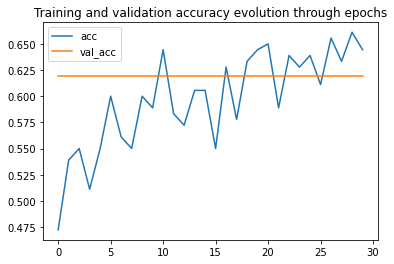

<Figure size 432x288 with 0 Axes>

In [142]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

In [143]:
model.evaluate(X_train,y_train)

7/7 [==============================] - 0s 39ms/step - loss: 0.2371 - accuracy: 0.6119


[0.23708070814609528, 0.611940324306488]

In [144]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.2364 - accuracy: 0.6087


[0.23638349771499634, 0.6086956262588501]